# Interact with lerepi

In [7]:
import logging
import numpy as np
import matplotlib.pyplot as plt

import lenscarf.lerepi as lerepi
from lenscarf.lerepi.core.parser import lerepi_parser
from lenscarf.lerepi.core import handler
import abc
import os
os.environ.get('OMP_NUM_THREADS', 4)

import healpy as hp

from lenscarf.utils import read_map
from plancklens.qcinv import opfilt_pp

class parserclass:
    """An abstract element base type for the parser formalism."""
    __metaclass__ = abc.ABCMeta
    resume = ''
    config_file = ''
    purgehashs = ''
    status = ''
    
parser = parserclass()
module_path = os.path.dirname(lerepi.__file__)
parser.resume =  ''
parser.config_file = '{}/config/examples/interactive.py'.format(module_path)

lerepi_handler = handler.handler(parser)
lerepi_handler.collect_jobs()
# lerepi_handler.run()

INFO:lenscarf.lerepi.core.handler:store() Finished
INFO:lenscarf.lerepi.core.handler:collect_jobs() Started
INFO:lenscarf.lerepi.core.handler:collect_jobs() Finished


In [9]:
jobs = lerepi_handler.get_jobs()
print(jobs)

INFO:lenscarf.lerepi.core.handler:get_jobs() Started
INFO:lenscarf.lerepi.core.handler:get_jobs() Finished


[((DLENSALOT_Model(job=DLENSALOT_Job(QE_lensrec=True, MAP_lensrec=False, inspect_result=False, map_delensing=False, build_OBD=False, OMP_NUM_THREADS=8), analysis=DLENSALOT_Analysis(TEMP_suffix='interactive', K='p_p', V='', ITMAX=12, nsims_mf=100, LENSRES=1.7, Lmin=4, lmax_filt=4000, mmax_unl=4000, lmax_ivf=3000, mmax_ivf=3000, lmin_ivf=10, mmin_ivf=10, lmax_unl=4000, zbounds=('nmr_relative', inf), zbounds_len=('extend', 5.0), pbounds=[1.97, 5.71], STANDARD_TRANSFERFUNCTION=True), data=DLENSALOT_Data(IMIN=0, IMAX=499, class_parameters={'fg': '09'}, package_='lenscarf', module_='lerepi.config.cmbs4.data.data_08b', class_='caterinaILC_May12', beam=2.3, lmax_transf=4000, nside=2048), noisemodel=DLENSALOT_Noisemodel(typ='trunc', BMARG_LIBDIR='/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08b/', BMARG_LCUT=200, BMARG_RESCALE=1.4358945138491783, ninvjob_geometry='healpix_geometry', lmin_tlm=30, lmin_elm=30, lmin_blm=30, CENTRALNLEV_UKAMIN=0.42, nlev_t=0.296984

In [3]:
job = lerepi_handler.init_job(jobs[0])

INFO:lerepi.core.handler:Start of init_job()
INFO:lerepi.core.handler:transform started


jit: instantiating ctype = <class 'plancklens.qcinv.multigrid.multigrid_chain'>
jit: instantiating ctype = <class 'lenscarf.opfilt.bmodes_ninv.eblm_filter_ninv'>
*** alm_filter_ninv: switching to same ninv_geometry but with unit weights
Loading /global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08b/tniti.npy
**** RESCALING tiniti with 1.4359
ninv_febl: using 3.05 uK-amin noise Cl
cinv_p::noiseP_uk_arcmin = 0.682


Caching sky fractions...


INFO:lerepi.core.handler:transform done
INFO:lerepi.core.handler:model init started
INFO:lerepi.core.handler:model init done
INFO:lerepi.core.handler:collect_jobs started
INFO:lerepi.core.handler:collect_jobs done
INFO:lerepi.core.handler:Finished init_job()


In [4]:
Bwf = job.dlensalot_model.ivfs.get_sim_bmliklm(0)

(2048, 3000) [00:01:33] (0, 1.00000000)
(2048, 3000) [00:02:32] (1, 0.27854829)
(2048, 3000) [00:03:35] (2, 0.12734656)
(2048, 3000) [00:04:34] (3, 0.07490872)
(2048, 3000) [00:05:32] (4, 0.05025288)
(2048, 3000) [00:06:30] (5, 0.03605925)
(2048, 3000) [00:07:30] (6, 0.02714171)
(2048, 3000) [00:08:31] (7, 0.02093587)
(2048, 3000) [00:09:29] (8, 0.01660045)
(2048, 3000) [00:10:26] (9, 0.01348617)
(2048, 3000) [00:11:24] (10, 0.01116849)
(2048, 3000) [00:12:24] (11, 0.00946296)
(2048, 3000) [00:13:19] (12, 0.00813747)
(2048, 3000) [00:14:15] (13, 0.00703586)
(2048, 3000) [00:15:09] (14, 0.00609870)
(2048, 3000) [00:16:04] (15, 0.00535796)
(2048, 3000) [00:17:00] (16, 0.00475191)
(2048, 3000) [00:17:55] (17, 0.00425484)
(2048, 3000) [00:18:49] (18, 0.00382529)
(2048, 3000) [00:19:46] (19, 0.00344920)
(2048, 3000) [00:20:43] (20, 0.00312219)
(2048, 3000) [00:21:40] (21, 0.00284074)
(2048, 3000) [00:22:38] (22, 0.00256992)
(2048, 3000) [00:23:35] (23, 0.00236948)
(2048, 3000) [00:24:33] (2

KeyboardInterrupt: 

In [9]:
job.dlensalot_model.cinv_p.chain.instantiate()

KeyError: '__jit_args'

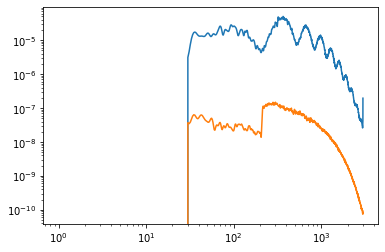

In [4]:
plt.plot(hp.alm2cl(job.dlensalot_model.ivfs.get_sim_emliklm(0)))
plt.plot(hp.alm2cl(job.dlensalot_model.ivfs.get_sim_bmliklm(0)))
plt.xscale('log')
plt.yscale('log')
# job.dlensalot_model.cinv_p

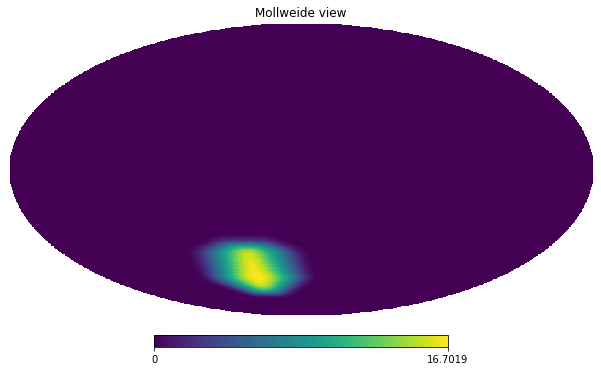

In [23]:
from lenscarf.utils import read_map
hp.mollview(read_map(job.dlensalot_model.cinv_p.ninv))#-read_map(parfile.cinv_p.ninv))

In [5]:
job.dlensalot_model.cinv_p.__dict__

{'lib_dir': '/global/cscratch1/sd/sebibel/cmbs4/08d_00_rNone_isOBD_MF100_OBDtest2/cinv_p',
 'lmax': 3000,
 'nside': 2048,
 'cl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08437306e+03, ...,
         4.73193243e-08, 4.72884497e-08, 4.72312005e-08]),
  'ee': array([0.00000000e+00, 0.00000000e+00, 3.62435072e-02, ...,
         5.94198156e-10, 5.93471562e-10, 5.93194004e-10]),
  'bb': array([0.00000000e+00, 0.00000000e+00, 1.97459570e-06, ...,
         3.76402516e-10, 3.76293414e-10, 3.75748914e-10]),
  'te': array([ 0.00000000e+00,  0.00000000e+00,  2.93875049e+00, ...,
         -7.69387920e-10, -7.68650143e-10, -7.67912762e-10])},
 'transf': array([1.        , 0.99999992, 0.99999976, ..., 0.69566554, 0.69549715,
        0.69532874]),
 'ninv': [[array([8.47641977]),
   '/global/cscratch1/sd/sebibel/cmbs4/08d_ninv_truncified.fits']],
 'n_inv_filt': <plancklens.qcinv.util.jit at 0x155511d5a8d0>,
 'chain': <plancklens.qcinv.util.jit at 0x155511d5a610>}